In [20]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from seaborn import countplot
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [21]:
tickets = pd.read_csv('C:/G/parking_citations.corrupted.csv')

# Exploratory Data Analysis

In [22]:
print(len(tickets))

8726014


In [23]:
tickets.head(25)

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,NaN,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,NaN,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NaN,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,NaN,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0
5,1106226590,2015-09-15T00:00:00,19.0,NaN,NaN,CA,201507.0,NaN,NaN,VN,GY,SAN PEDRO S/O BOYD,1A35W,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
6,1106500452,2015-12-17T00:00:00,1710.0,NaN,NaN,CA,201605.0,NaN,MAZD,PA,BL,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,99999.0,99999.0
7,1106500463,2015-12-17T00:00:00,1710.0,NaN,NaN,CA,201602.0,NaN,NaN,PA,BK,SUNSET/ALVARADO,00217,1.0,8070,PARK IN GRID LOCK ZN,163.0,99999.0,99999.0
8,1106506402,2015-12-22T00:00:00,945.0,NaN,NaN,CA,201605.0,NaN,NaN,PA,BR,721 S WESTLAKE,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,99999.0,99999.0
9,1106506413,2015-12-22T00:00:00,1100.0,NaN,NaN,CA,201701.0,NaN,NaN,PA,SI,1159 HUNTLEY DR,2A75,1.0,8069AA,NO STOP/STAND AM,93.0,99999.0,99999.0


In [24]:
###  Get missing values as percentage in all collumns
missing = tickets.isnull().sum()/len(tickets)*100
missing

Ticket number             0.000000
Issue Date                0.006143
Issue time                0.029601
Meter Id                 73.991538
Marked Time              96.669739
RP State Plate            0.008767
Plate Expiry Date         9.108706
VIN                      99.813099
Make                     50.062606
Body Style                0.101879
Color                     0.047158
Location                  0.009787
Route                     0.748956
Agency                    0.006246
Violation code            0.000000
Violation Description     0.009993
Fine amount               0.074570
Latitude                  0.000034
Longitude                 0.000034
dtype: float64

In [25]:
### Create a list to drop variables starting with those that have a majority of missing values, too many missing to impute
drop_vars = list(missing[missing>51].index)
drop_vars

['Meter Id', 'Marked Time', 'VIN']

In [26]:
### Find number of unique values in each
levels = tickets.nunique()
levels

Ticket number            8726014
Issue Date                  1843
Issue time                  1440
Meter Id                   37823
Marked Time                 1219
RP State Plate                78
Plate Expiry Date            873
VIN                         7745
Make                        1477
Body Style                   191
Color                        106
Location                 1506075
Route                       8479
Agency                        44
Violation code               297
Violation Description        795
Fine amount                   39
Latitude                  981328
Longitude                1034914
dtype: int64

In [27]:
### look at some of the high dimensional features

print(tickets['Latitude'].value_counts().sort_values(ascending=False).head(20))
print('\n')
print(tickets['Location'].value_counts().sort_values(ascending=False).head(20))
print('\n')
print(tickets['Route'].value_counts().sort_values(ascending=False).head(20))

9.999900e+04    1311184
6.463690e+06       8374
6.419829e+06       7516
6.462121e+06       6857
6.458312e+06       6714
6.463690e+06       6369
6.461454e+06       5642
6.421106e+06       5287
6.448999e+06       5235
6.458312e+06       4718
6.463690e+06       4430
6.463690e+06       4254
6.458313e+06       3978
6.427372e+06       3867
6.449301e+06       3861
6.457731e+06       3706
6.470141e+06       3676
6.457731e+06       3671
6.486945e+06       3514
6.449000e+06       3457
Name: Latitude, dtype: int64


1301 ELECTRIC AVE       9436
11600 SAN VICENTE BL    7062
101 LARCHMONT BL N      6331
2377 MIDVALE AVE        5853
1600 IRVING TABOR CT    5477
4301 TUJUNGA AV         5175
5901 98TH ST W          5029
12100 VENTURA BL        4898
2800 E OBSERVATORY      4878
1235 FIGUEROA PL        4863
7000 HAWTHORN AVE       4858
4300 TUJUNGA AV         4825
3101 GLENDALE BL        4507
11100 WEDDINGTON ST     4446
100 LARCHMONT BL N      4337
11601 SAN VICENTE BL    4320
11001 MCCORMICK ST      4

In [28]:
### Add High Dimensional features to drop list, could potentially use top 100 and create new category
### for all others, not likely to help since most categories distributed fairly evenly

drop_vars.extend(list(levels[levels > 2000].index))

In [29]:
### Look at distrution of states to determine in state/out of state
print(tickets.groupby('RP State Plate')['RP State Plate'].size().sort_values(ascending=False).head(20))

RP State Plate
CA    8127986
AZ      77649
TX      55337
NV      51944
FL      37924
WA      34585
IL      24995
OR      24291
CO      22167
NY      16261
PA      12777
UT      12447
MI      12231
OH      11966
NJ      11648
GA      11624
IN      11270
TN      11222
VA      10463
MA       9405
Name: RP State Plate, dtype: int64


In [30]:
### Given the variables are mostly categorical, describe is not very benenficial. Checking for sake of completeness
tickets.describe()

,Issue time,Marked Time,Plate Expiry Date,Agency,Fine amount,Latitude,Longitude
count,8.723431e+06,290599.000000,7.931187e+06,8.725469e+06,8.719507e+06,8.726011e+06,8.726011e+06
mean,1.203930e+03,1055.399286,1.867823e+05,5.200932e+01,7.011293e+01,5.501648e+06,1.586792e+06
std,4.722413e+02,227.596205,5.276278e+04,9.301675e+00,3.211512e+01,3.004177e+06,2.065458e+06
min,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+01,9.999900e+04,9.999900e+04
25%,9.120000e+02,910.000000,2.016010e+05,5.100000e+01,6.300000e+01,6.421512e+06,1.821558e+06
50%,1.156000e+03,1035.000000,2.017020e+05,5.400000e+01,6.800000e+01,6.451540e+06,1.841987e+06
75%,1.511000e+03,1200.000000,2.018030e+05,5.500000e+01,7.300000e+01,6.475013e+06,1.858207e+06
max,2.359000e+03,2400.000000,8.201080e+05,9.700000e+01,5.050000e+02,4.042322e+09,4.042322e+09


In [31]:
### Get number of records that are not corrupted
len(tickets[tickets.Make.notnull()])

4357544

# Visualizations

In [32]:
### create sample for hist plot, full data too big

state_plot = tickets['RP State Plate'][tickets['RP State Plate'].notnull()].sample(frac = .005, random_state =321)

In [33]:
len(state_plot)

43626

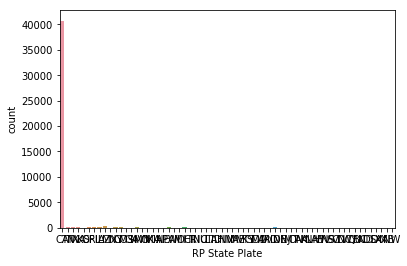

In [34]:
### Not useful need to rework - really just trying to give examples
countplot(state_plot)

#  Create Modeling Dataset

In [35]:
### remove corrupted records, drop_vars list and reset index
tic_mod = tickets[tickets.Make.notnull()]
tic_mod.reset_index(drop=True, inplace=True)
tic_mod.drop(drop_vars, axis=1, inplace = True)
tic_mod.head()

C:\Users\robto\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Agency,Violation code,Violation Description,Fine amount
0,2015-09-15T00:00:00,115.0,CA,200316.0,CHEV,PA,BK,1.0,8069A,NO STOPPING/STANDING,93.0
1,2015-12-17T00:00:00,1710.0,CA,201605.0,MAZD,PA,BL,1.0,8070,PARK IN GRID LOCK ZN,163.0
2,2015-12-22T00:00:00,1100.0,CA,201511.0,FORD,TR,WH,1.0,8069AA,NO STOP/STAND AM,93.0
3,2015-12-22T00:00:00,1105.0,CA,201701.0,CHRY,PA,GO,1.0,8069AA,NO STOP/STAND AM,93.0
4,2015-12-27T00:00:00,1055.0,CA,201605.0,TOYO,PA,BK,54.0,8058L,PREF PARKING,68.0


In [36]:
### Convert date fields to datetime format, Plate Expiry needs to be numeric first due to decimal
tic_mod['Issue Date Fixed'] = pd.to_datetime(tic_mod['Issue Date'], infer_datetime_format = True)
tic_mod['Plate Expiry Date Num'] = pd.to_numeric(tic_mod['Plate Expiry Date']).fillna(0).astype(np.int)


C:\Users\robto\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\robto\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [37]:
### In converting Plate Expiry to a date, I discoverd there many invalid dates
### Drop Plate Expiry Dates before 1990 (judgement call) and after 2019 and records with month > 12 or =0

tic_mod = tic_mod[(tic_mod['Plate Expiry Date Num'] < 202001) & (tic_mod['Plate Expiry Date Num'] > 198912) & (tic_mod['Plate Expiry Date Num'] % 100 < 13) & (tic_mod['Plate Expiry Date Num'] % 100 > 0)]

In [38]:
print(tic_mod['Plate Expiry Date Num'][tic_mod['Plate Expiry Date Num'] > 0].value_counts().sort_values(ascending=False).head())

201606    83989
201706    83725
201708    82718
201608    82383
201703    81494
Name: Plate Expiry Date Num, dtype: int64


In [39]:
### Verify invalid dates have been removed
print(tic_mod['Plate Expiry Date Num'].max())
print(tic_mod['Plate Expiry Date Num'].min())
tic_mod[tic_mod['Plate Expiry Date Num'] % 100 >12]

201912
199001


,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Agency,Violation code,Violation Description,Fine amount,Issue Date Fixed,Plate Expiry Date Num


In [40]:
### Now that valid dates are remaing, complete converting Plate Expiry to datetime
tic_mod['Plate Expiry Date Fixed'] = pd.to_datetime(tic_mod['Plate Expiry Date Num'], format='%Y%m')

In [41]:
### Create expired plate flag in case it is predictive and for future analysis
tic_mod['Expired Plates'] = np.where(tic_mod['Issue Date Fixed'] >= tic_mod['Plate Expiry Date Fixed'],'Yes','No')

### Create variable for day of week ticket issued
tic_mod['DOW Ticket Issued'] = tic_mod['Issue Date Fixed'].dt.day_name()
### Create variable for month ticket issued
tic_mod['Month Ticket Issued'] = tic_mod['Issue Date Fixed'].dt.month_name()

### Create residency variable in case it is predictive and for future analysis
tic_mod['Residency'] = tic_mod['RP State Plate'].apply(lambda x: 'In State' if  x == 'CA' else 'Out of State')

tic_mod.head()

,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Agency,Violation code,Violation Description,Fine amount,Issue Date Fixed,Plate Expiry Date Num,Plate Expiry Date Fixed,Expired Plates,DOW Ticket Issued,Month Ticket Issued,Residency
1,2015-12-17T00:00:00,1710.0,CA,201605.0,MAZD,PA,BL,1.0,8070,PARK IN GRID LOCK ZN,163.0,2015-12-17,201605,2016-05-01,No,Thursday,December,In State
2,2015-12-22T00:00:00,1100.0,CA,201511.0,FORD,TR,WH,1.0,8069AA,NO STOP/STAND AM,93.0,2015-12-22,201511,2015-11-01,Yes,Tuesday,December,In State
3,2015-12-22T00:00:00,1105.0,CA,201701.0,CHRY,PA,GO,1.0,8069AA,NO STOP/STAND AM,93.0,2015-12-22,201701,2017-01-01,No,Tuesday,December,In State
4,2015-12-27T00:00:00,1055.0,CA,201605.0,TOYO,PA,BK,54.0,8058L,PREF PARKING,68.0,2015-12-27,201605,2016-05-01,No,Sunday,December,In State
6,2015-12-22T00:00:00,1102.0,CA,201606.0,HOND,PA,BK,1.0,8069B,NO PARKING,73.0,2015-12-22,201606,2016-06-01,No,Tuesday,December,In State


In [42]:
print(tic_mod['Agency'].value_counts().sort_values(ascending=False).head(10))

54.0    907023
51.0    854900
56.0    719307
53.0    647207
55.0    377116
1.0      87313
2.0      24065
57.0     17268
4.0      11876
58.0      4136
Name: Agency, dtype: int64


In [43]:
### Split time issued into bins, likely more predictive than leaving as continous
def ticket_issued_bins(x):
    if x >= 0 and x <= 400:
        bin =  "Early Morning"
    elif x > 400 and x <= 800:
        bin =  "Morning"
    elif x > 800 and x <= 1159:
        bin = "Late Morning"
    elif x > 1159 and x <= 1600:
        bin = "Afternoon"
    elif x > 1600 and  x <= 2000:
        bin = "Evening"
    else:
        bin = "Late Evening"
    return bin        

In [44]:
### apply ticket_issued_bin
tic_mod['Issue TOD'] = tic_mod['Issue time'].apply(ticket_issued_bins)

In [45]:
### Create a Top 25 list based on frequency in data set - needed for target variable
top25 = list(tic_mod['Make'].value_counts().sort_values(ascending=False).head(25).index)
top25

['TOYT',
 'HOND',
 'FORD',
 'NISS',
 'CHEV',
 'BMW',
 'MERZ',
 'VOLK',
 'HYUN',
 'DODG',
 'LEXS',
 'JEEP',
 'KIA',
 'MAZD',
 'AUDI',
 'CHRY',
 'INFI',
 'GMC',
 'ACUR',
 'SUBA',
 'TOYO',
 'VOLV',
 'MITS',
 'CADI',
 'MNNI']

In [46]:
### Create flag for target variable
tic_mod['Top25'] = np.where(tic_mod.Make.isin(top25), 1,0)
tic_mod.head()

,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Agency,Violation code,Violation Description,Fine amount,Issue Date Fixed,Plate Expiry Date Num,Plate Expiry Date Fixed,Expired Plates,DOW Ticket Issued,Month Ticket Issued,Residency,Issue TOD,Top25
1,2015-12-17T00:00:00,1710.0,CA,201605.0,MAZD,PA,BL,1.0,8070,PARK IN GRID LOCK ZN,163.0,2015-12-17,201605,2016-05-01,No,Thursday,December,In State,Evening,1
2,2015-12-22T00:00:00,1100.0,CA,201511.0,FORD,TR,WH,1.0,8069AA,NO STOP/STAND AM,93.0,2015-12-22,201511,2015-11-01,Yes,Tuesday,December,In State,Late Morning,1
3,2015-12-22T00:00:00,1105.0,CA,201701.0,CHRY,PA,GO,1.0,8069AA,NO STOP/STAND AM,93.0,2015-12-22,201701,2017-01-01,No,Tuesday,December,In State,Late Morning,1
4,2015-12-27T00:00:00,1055.0,CA,201605.0,TOYO,PA,BK,54.0,8058L,PREF PARKING,68.0,2015-12-27,201605,2016-05-01,No,Sunday,December,In State,Late Morning,1
6,2015-12-22T00:00:00,1102.0,CA,201606.0,HOND,PA,BK,1.0,8069B,NO PARKING,73.0,2015-12-22,201606,2016-06-01,No,Tuesday,December,In State,Late Morning,1


In [47]:
### See if there is a pattern to color and top25
tic_mod['COUNTER'] = 1

df_agg = tic_mod.groupby(['Top25','Color']).agg({'COUNTER':sum})
g = df_agg['COUNTER'].groupby(level=0, group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False))

In [48]:
res[0].head(10)

Color
WT    63382
BK    61609
GY    37728
SL    23361
BL    21197
RD    14324
BN    11945
GN    10141
WH     6932
GO     4341
Name: COUNTER, dtype: int64

In [49]:
res[1].head(10)

Color
BK    730566
GY    687273
WT    668842
SL    451273
BL    271015
RD    168789
GN     98219
GO     46566
MR     41915
WH     38051
Name: COUNTER, dtype: int64

In [50]:
tic_mod.dtypes

Issue Date                         object
Issue time                        float64
RP State Plate                     object
Plate Expiry Date                 float64
Make                               object
Body Style                         object
Color                              object
Agency                            float64
Violation code                     object
Violation Description              object
Fine amount                       float64
Issue Date Fixed           datetime64[ns]
Plate Expiry Date Num               int32
Plate Expiry Date Fixed    datetime64[ns]
Expired Plates                     object
DOW Ticket Issued                  object
Month Ticket Issued                object
Residency                          object
Issue TOD                          object
Top25                               int32
COUNTER                             int64
dtype: object

In [51]:
### remove unneeded fields to simplify dataframe
tic_mod.drop(['Plate Expiry Date Num','Issue Date','Plate Expiry Date', 'Issue time','Make','Issue Date Fixed','Plate Expiry Date Fixed','COUNTER'], axis =1, inplace = True)
tic_mod.head()

,RP State Plate,Body Style,Color,Agency,Violation code,Violation Description,Fine amount,Expired Plates,DOW Ticket Issued,Month Ticket Issued,Residency,Issue TOD,Top25
1,CA,PA,BL,1.0,8070,PARK IN GRID LOCK ZN,163.0,No,Thursday,December,In State,Evening,1
2,CA,TR,WH,1.0,8069AA,NO STOP/STAND AM,93.0,Yes,Tuesday,December,In State,Late Morning,1
3,CA,PA,GO,1.0,8069AA,NO STOP/STAND AM,93.0,No,Tuesday,December,In State,Late Morning,1
4,CA,PA,BK,54.0,8058L,PREF PARKING,68.0,No,Sunday,December,In State,Late Morning,1
6,CA,PA,BK,1.0,8069B,NO PARKING,73.0,No,Tuesday,December,In State,Late Morning,1


In [52]:
### Convert objects to categories
tic_mod[tic_mod.select_dtypes(['object']).columns] = tic_mod.select_dtypes(['object']).apply(lambda x: x.astype('category'))

### Convert Agency to categorical
tic_mod['Agency'] = tic_mod['Agency'].astype('category')
        
tic_mod.dtypes

RP State Plate           category
Body Style               category
Color                    category
Agency                   category
Violation code           category
Violation Description    category
Fine amount               float64
Expired Plates           category
DOW Ticket Issued        category
Month Ticket Issued      category
Residency                category
Issue TOD                category
Top25                       int32
dtype: object

In [53]:
### Check target variable distribution
print(tic_mod['Top25'].value_counts().sort_values(ascending=False))

1    3378489
0     281314
Name: Top25, dtype: int64


In [54]:
### Take a sample of the data set to reduce training due to nature of this exercise
tic_mod = tic_mod.sample(frac=0.04, random_state=321)

In [55]:
### create one hot encoded df for training
model_df = pd.get_dummies(tic_mod, columns = tic_mod.select_dtypes(['category']).columns)

In [56]:
print(model_df['Top25'].value_counts().sort_values(ascending=False))

1    135266
0     11126
Name: Top25, dtype: int64


In [57]:
model_df.head()

,Fine amount,Top25,RP State Plate_AB,RP State Plate_AK,RP State Plate_AL,RP State Plate_AR,RP State Plate_AS,RP State Plate_AZ,RP State Plate_BC,RP State Plate_CA,...,Month Ticket Issued_October,Month Ticket Issued_September,Residency_In State,Residency_Out of State,Issue TOD_Afternoon,Issue TOD_Early Morning,Issue TOD_Evening,Issue TOD_Late Evening,Issue TOD_Late Morning,Issue TOD_Morning
3707902,68.0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4163899,58.0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
3910739,73.0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
3498638,73.0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
670852,63.0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [58]:
### Determine if any NaN exist, causes issues with RandomUnderSampler
model_df.columns[model_df.isna().any()].tolist()

['Fine amount']

In [59]:
### Fix NaN by replacing with 0, could also drop rows
model_df['Fine amount'].fillna(0, inplace=True)

In [60]:
### Seperate features and target
X = model_df.drop(['Top25'], axis = 1)
y = model_df['Top25']

### Create balanced sample
rus = RandomUnderSampler(random_state=321)
X_resampled, y_resampled = rus.fit_sample(X, y)

In [61]:
### Verify target class is balanced
unique, counts = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 11126]
 [    1 11126]]


In [62]:
### Create Training and Test Set
X_train,X_test,y_train,y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=321)
print(len(X_train))
print(len(X_test))

17801
4451


In [109]:
X_train

array([[25.,  0.,  0., ...,  0.,  0.,  0.],
       [25.,  0.,  0., ...,  0.,  0.,  0.],
       [73.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [63.,  0.,  0., ...,  0.,  0.,  0.],
       [63.,  0.,  0., ...,  0.,  0.,  0.],
       [63.,  0.,  0., ...,  0.,  0.,  0.]])

In [63]:
### Create Basic Tuning Grid

params = {
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 4, 5]
        }

In [64]:
### Fit Model

folds = 3
iters = 2

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 321)

model = XGBClassifier(n_estimators=100, objective='binary:logistic', nthread=1)

random_search = RandomizedSearchCV(model, param_distributions=params, n_iter=iters, scoring='roc_auc', n_jobs=3, cv=skf.split(X_train,y_train), verbose=3, random_state=321 )

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   4 out of   6 | elapsed:   43.9s remaining:   21.9s
[Parallel(n_jobs=3)]: Done   6 out of   6 | elapsed:   44.1s finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x00000234D4F87F48>,
          error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=1, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=2, n_jobs=3,
          param_distributions={'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=321, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [65]:
### Determine best parameters
print(random_search.best_params_)

{'max_depth': 3, 'learning_rate': 0.01}


In [66]:
# make predictions for test data
y_pred = random_search.predict_proba(X_test)
y_pred_proba = y_pred[:,1]
#predictions = [round(value) for value in y_pred]


In [67]:
# evaluate predictions
accuracy = accuracy_score(y_test, np.round(y_pred_proba,0))
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 61.72%


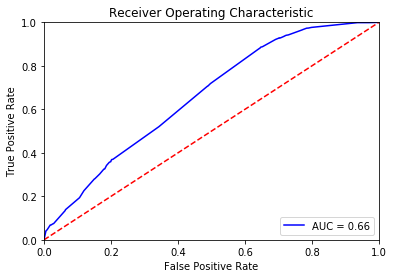

In [68]:
### plot roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Create Transformations for Predictions on Unseen Data

In [121]:
### load data to predict Top25
#new_data = pd.read_csv('new_data.csv')
new_data = tickets[tickets.Make.isnull()].head()
new_data

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,NaN,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,NaN,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NaN,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,NaN,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
5,1106226590,2015-09-15T00:00:00,19.0,NaN,NaN,CA,201507.0,NaN,NaN,VN,GY,SAN PEDRO S/O BOYD,1A35W,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0


In [122]:
### run same transformations as training data
new_data.drop(drop_vars, axis=1, inplace = True)
new_data['Issue Date Fixed'] = pd.to_datetime(new_data['Issue Date'], infer_datetime_format = True)
new_data['Plate Expiry Date Num'] = pd.to_numeric(new_data['Plate Expiry Date']).fillna(0).astype(np.int)
new_data = new_data[(new_data['Plate Expiry Date Num'] < 202001) & (new_data['Plate Expiry Date Num'] > 198912) & (new_data['Plate Expiry Date Num'] % 100 < 13) & (new_data['Plate Expiry Date Num'] % 100 > 0)]
new_data['Plate Expiry Date Fixed'] = pd.to_datetime(new_data['Plate Expiry Date Num'], format='%Y%m')
new_data['Expired Plates'] = np.where(new_data['Issue Date Fixed'] >= new_data['Plate Expiry Date Fixed'],'Yes','No')
new_data['DOW Ticket Issued'] = new_data['Issue Date Fixed'].dt.day_name()
new_data['Month Ticket Issued'] = new_data['Issue Date Fixed'].dt.month_name()
new_data['Residency'] = new_data['RP State Plate'].apply(lambda x: 'In State' if  x == 'CA' else 'Out of State')
new_data['Issue TOD'] = new_data['Issue time'].apply(ticket_issued_bins)
new_data.drop(['Plate Expiry Date Num','Issue Date','Plate Expiry Date', 'Issue time','Issue Date Fixed','Plate Expiry Date Fixed','Make'], axis =1, inplace = True)
new_data[new_data.select_dtypes(['object']).columns] = new_data.select_dtypes(['object']).apply(lambda x: x.astype('category'))
new_data['Agency'] = new_data['Agency'].astype('category')


### get missing colums for one hot encoding
cats = X.columns

### one hot encode new data
pred_df = pd.get_dummies(new_data, columns = new_data.select_dtypes(['category']).columns)

### add back missing columns
pred_df = pred_df.T.reindex(cats).T.fillna(0)


C:\Users\robto\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\robto\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\robto\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

,Fine amount,RP State Plate_AB,RP State Plate_AK,RP State Plate_AL,RP State Plate_AR,RP State Plate_AS,RP State Plate_AZ,RP State Plate_BC,RP State Plate_CA,RP State Plate_CN,...,Month Ticket Issued_October,Month Ticket Issued_September,Residency_In State,Residency_Out of State,Issue TOD_Afternoon,Issue TOD_Early Morning,Issue TOD_Evening,Issue TOD_Late Evening,Issue TOD_Late Morning,Issue TOD_Morning
0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [126]:
# make predictions for test data
new_pred = random_search.predict_proba(pred_df.values)
new_pred_proba = new_pred[:,1]
#predictions = [round(value) for value in y_pred]
new_pred_proba

array([0.45383695, 0.61261714, 0.49242133, 0.61261714], dtype=float32)